# Building Your Second Neural Network




In this notebook, we will take advantage of what we have learnt in the notebook **First_Neural_Network** and apply it to a new case. This time, we will be working with the dataset Fashion-MNIST, which is comprised of images from the clothing shop *Zalando*. In terms of size, we will be dealing with the same as before, as we have 70000 images (60000 for training and 10000 for testing) of 28x28 pixels each, so each image will be associated to a 28x28 matrix. 

## Preparing the data

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 

#autoreloads modules
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

We have 10 different kinds of articles of clothing, each of them associated with a number from 0 to 9:

  - 0 : T-shirt
  - 1 : Trouser
  - 2 : Pullover
  - 3 : Dress
  - 4 : Coat
  - 5 : Sandal
  - 6 : Shirt
  - 7 : Sneaker
  - 8 : Bag
  - 9 : Ankle Boot
  
Using the numbers as labels is the best option to manipulate the data, but we can prepare already a list with the class names:

In [5]:
class_names = ["T-Shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

Again, let's scale the datasets and change the labels to categorical form:



In [6]:
from tensorflow.keras.utils import to_categorical


x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train = x_train/255
x_test = x_test/255




y_train_cat = to_categorical(y_train,num_classes=10) #we set new variable. Use this for the fit 
y_test_cat = to_categorical(y_test,num_classes=10) #we set new variable


Let's have a look at some of the images:



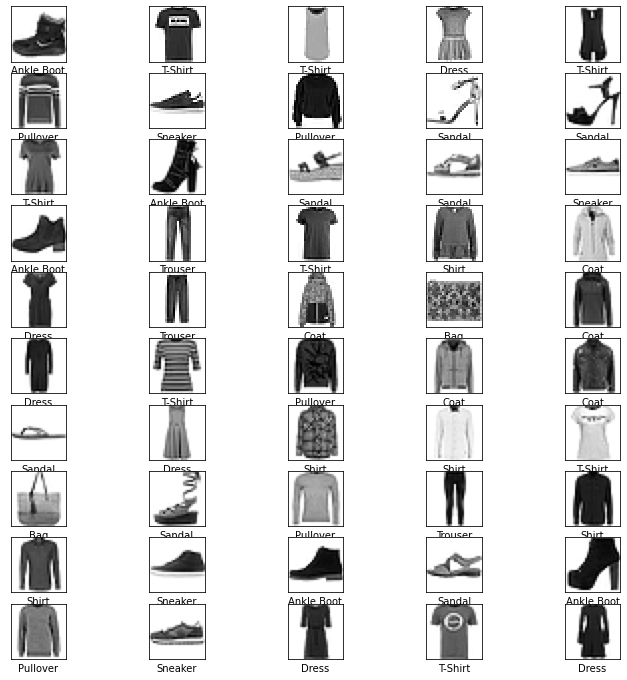

In [7]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([]) #we will just remove them
    plt.yticks([])
    plt.grid(False) #not needed either
    plt.imshow(x_train[i],cmap=plt.cm.binary) #images will be plottedi n shades of grey
    plt.xlabel(class_names[y_train[i]]) #already associating the name and the numerical label
plt.show()

In the previous notebook, we saw that it is convenient to reshape the 28x28 matrices corresponding to each image into arrays of length 784. However, Keras already allows us to do this with the method `Flatten()`. In order to make it work, we must provide the method with the input shape, which in this case is 28x28:

In [8]:
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(10,input_shape=(784,),activation="sigmoid",name="dense_1"))
model.add(layers.Dense(10,activation="softmax",name="dense_2"))

Again, we must configure the learning process of our model, which is the same as before:


In [9]:
model.compile(loss="categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

## Model Fitting And Evaluation

Now it is time to fit the model:

In [10]:
model.fit(x_train,y_train_cat,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 751us/step - loss: 2.0090 - accuracy: 0.3109
Epoch 2/5
1875/1875 [==============================] - 1s 729us/step - loss: 1.3168 - accuracy: 0.6573
Epoch 3/5
1875/1875 [==============================] - 1s 741us/step - loss: 1.0322 - accuracy: 0.7083
Epoch 4/5
1875/1875 [==============================] - 1s 711us/step - loss: 0.8766 - accuracy: 0.7389
Epoch 5/5
1875/1875 [==============================] - 1s 720us/step - loss: 0.7856 - accuracy: 0.7645


And now we can evaluate:



In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 0s 705us/step - loss: 0.7498 - accuracy: 0.7635


This time, the model does not perform as well as with numbers, probably because articles of clothing are more complex to work with. This might also mean that we should try fitting with a different optimizer, but we will leave this for another occasion. It is interesting to see that the test accuracy is similar to the train accuracy, which suggests that the neural network is not overfitted to the training data. Let's have a look at the confusion matrix:

In this notebook, we will use `confusion_matrix_plot_nonbin`, which is a function built with the code we wrote in the previous notebook. The file _deepl_funcs.py_ gathers some functions that were coded in the process of writing these notebooks and which can be helpful in the future. 

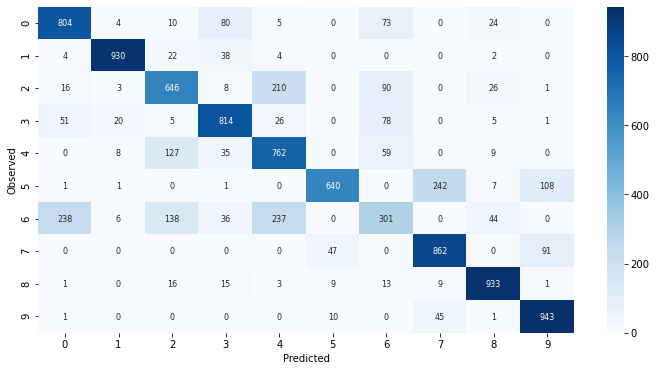

In [19]:
import deepl_funcs

y_pred = model.predict_classes(x_test)#if we use predict(), we would obtain the scores of the regression. This returns the class
deepl_funcs.confusion_matrix_plot_nonbin(y_test,y_pred)

## Making Predictions 

It is time to make predictions. Actually, we have already done them in the previous cell with `predict_classes`, but now we will use `predict`:

In [29]:
predictions = model.predict(x_test) #remember that this gives arrays with probabilities


predictions_argmax = np.argmax(predictions,axis=1) #don't forget the axis=1

predictions_name = [class_names[pred_num] for pred_num in predictions_argmax] #changing from numbers to names


Let's have a look at one of the predictions to give one example:

In [30]:
predictions_name[2]

'Trouser'

Text(0.5, 0, 'Dress')

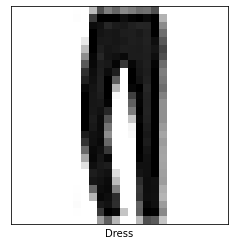

In [31]:
plt.xticks([]) #we will just remove them
plt.yticks([])
plt.grid(False) #not needed either
plt.imshow(x_test[2],cmap=plt.cm.binary)
plt.xlabel(class_names[y_train[i]]) #already associating the name and the numerical label


So we can see that in this case, the neural network did a good job.

Let's go a step further and plot a graph with the probabilities for each class along with the corresponding image. First of all, we should code two functions to plot the image and the graph:

In [55]:
def plot_image(x,y_pred,y_pred_prob_max,y_true,y_names): #function to plot images
   y_pred_prob_max = np.round(y_pred_prob_max*100,2) # probability of the predicted label
   plt.xticks([]) 
   plt.yticks([])
   plt.grid(False)
   plt.imshow(x,cmap=plt.cm.binary)
   plt.xlabel(f" {y_pred_prob_max}% {y_names[y_pred]} ({y_names[y_true]})" ) # predicted label with probability + true label

def plot_prob_graph(y_pred_prob,y_names):
    y_pred_prob = np.round(y_pred_prob*100,2) #probability array 
    labels_num = np.arange(len(y_pred_prob))
    plt.bar(labels_num,y_pred_prob)
    plt.xticks(labels_num, (y_names)) #necessary to change tick names 
    

Since we only have the predicted labels and not their probabilities, we must ask for them before using the functions:

In [67]:
predictions_max = np.max(predictions,axis=1)
predictions_max


array([0.49152204, 0.62804437, 0.9055136 , ..., 0.40569958, 0.7946387 ,
       0.4777868 ], dtype=float32)

And now we apply both functions to each image. Actually, let's just stick to the first 10 images of the test set. If we would like to have more we would only have to change `n_images` in the code below (make sure it is an even number):

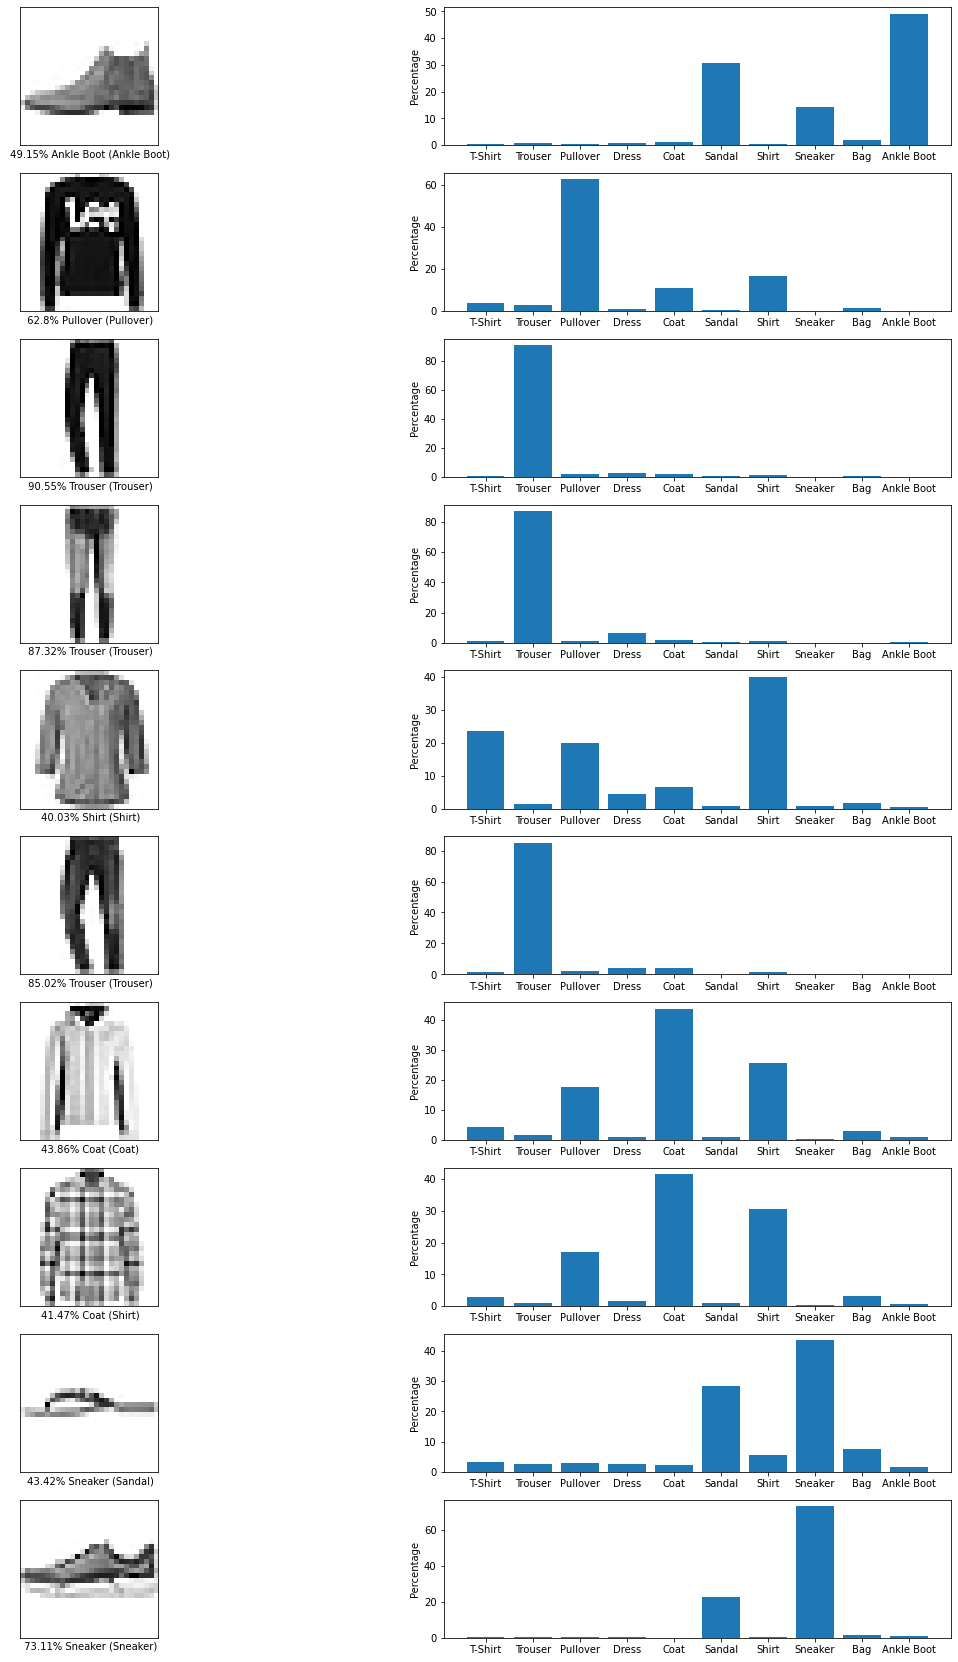

In [80]:
plt.figure(figsize=(4*5,2*15))

n_images = 10 

for i in range(10):
     plt.subplot(n_images,2,int(2*i+1))    
     plot_image(x_test[i],predictions_argmax[i],predictions_max[i],y_test[i],class_names)
     plt.subplot(n_images,2,int(2*i+2))   
     plt.ylabel("Percentage")
     plot_prob_graph(predictions[i],class_names)
    

As you can see, the model confuses sneakers with sandals and coats with shirts, which seems reasonable, as they are pretty similar pieces of clothing. It is also important to notice how good the models perform with trousers, which are probably the clothes that are the easiest to distinguish from any other article.